<div style="font-family: 'Segoe UI', Roboto, Arial, sans-serif; border-radius:12px; padding:18px; background:#f7fbff; border:1px solid #cfe9fb; color:#03314b; max-width:950px; margin:10px auto; box-shadow:0 6px 18px rgba(3,49,75,0.08);">
  <div style="font-size:20px; font-weight:700; margin-bottom:10px; color:#013a63;">
    Bug Dataset EDA & Preprocessing
  </div>
  <ul style="margin:0; padding-left:18px;">
    <li style="margin:8px 0; line-height:1.45;"><b>Data Cleaning:</b> Dropped <code>Bug ID</code>, <code>Status</code>, <code>Resolution</code>, <code>Assignee</code>. Converted dtypes, extracted <b>Year</b> & <b>Month</b> from <code>Updated</code>.</li>
    <li style="margin:8px 0; line-height:1.45;"><b>Feature Engineering:</b> Grouped rare <code>Product</code> values into "Other" (kept top 15). Final features: <code>Summary</code> (text), <code>Product_grouped</code>, <code>Component</code> (categorical), <code>Year</code>, <code>Month</code> (numeric).</li>
    <li style="margin:8px 0; line-height:1.45;"><b>Preprocessing:</b> Used <code>TfidfVectorizer</code> for text, <code>OneHotEncoder</code> for categorical, <code>passthrough</code> for numeric. Combined with <code>ColumnTransformer</code>.</li>
    <li style="margin:8px 0; line-height:1.45;"><b>Balancing:</b> Classes imbalanced: defect(6712), task(2280), enhancement(1008). Applied <b>SMOTE</b> → balanced classes by oversampling minority.</li>
    <li style="margin:8px 0; line-height:1.45;"><b>Visualization 1:</b> Countplot before/after SMOTE → shows class imbalance solved.</li>
    <li style="margin:8px 0; line-height:1.45;"><b>Visualization 2:</b> Bugs per Year → bar plot shows yearly trend in bug reports.</li>
    <li style="margin:8px 0; line-height:1.45;"><b>Visualization 3:</b> Bug Type per Product → grouped countplot with <code>hue=Type</code>.</li>
    <li style="margin:8px 0; line-height:1.45;"><b>Visualization 4:</b> WordCloud → quick view of common words in <code>Summary</code>.</li>
    <li style="margin:8px 0; line-height:1.45;"><b>Visualization 5:</b> Heatmap → pivot (bugs per product per year).</li>
    <li style="margin:8px 0; line-height:1.45;"><b>Visualization 6:</b> Top Words per Type → CountVectorizer, pick top 10 per bug type, plotted with teal/blue shades.</li>
  </ul>

  "We cleaned and engineered features, then used TF-IDF + OneHotEncoder for preprocessing. Since data was imbalanced, SMOTE was applied. Finally, EDA visualizations showed distributions and keyword insights per bug type."


(10000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Bug ID      10000 non-null  int64 
 1   Type        10000 non-null  object
 2   Summary     10000 non-null  object
 3   Product     10000 non-null  object
 4   Component   10000 non-null  object
 5   Assignee    10000 non-null  object
 6   Status      10000 non-null  object
 7   Resolution  10000 non-null  object
 8   Updated     10000 non-null  object
dtypes: int64(1), object(8)
memory usage: 703.3+ KB
None
             Bug ID
count  1.000000e+04
mean   1.327829e+06
std    5.834898e+05
min    1.772000e+03
25%    9.502318e+05
50%    1.634381e+06
75%    1.764864e+06
max    1.949890e+06
Index(['Bug ID', 'Type', 'Summary', 'Product', 'Component', 'Assignee',
       'Status', 'Resolution', 'Updated'],
      dtype='object')
    Bug ID         Type                                            S

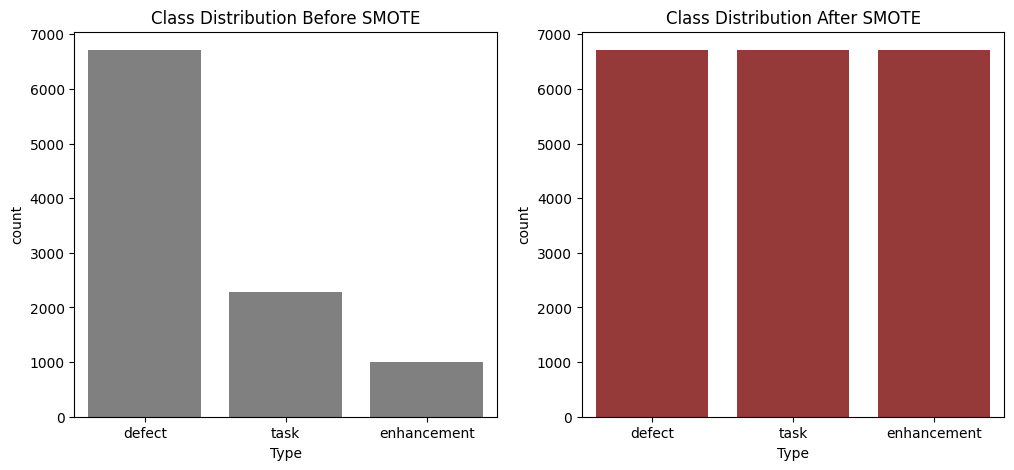

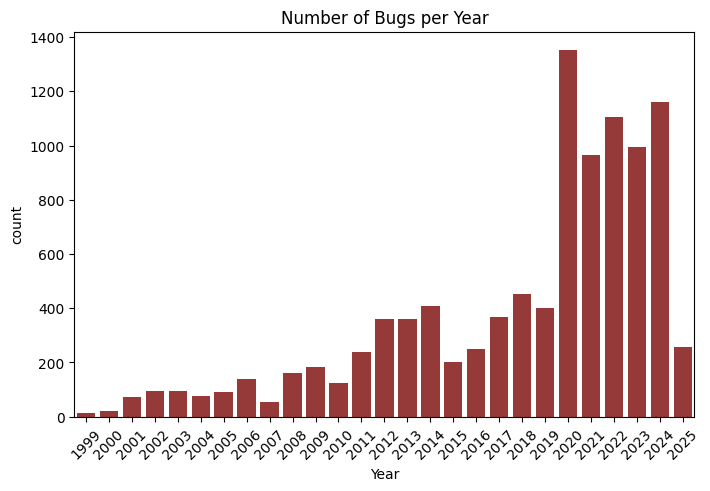

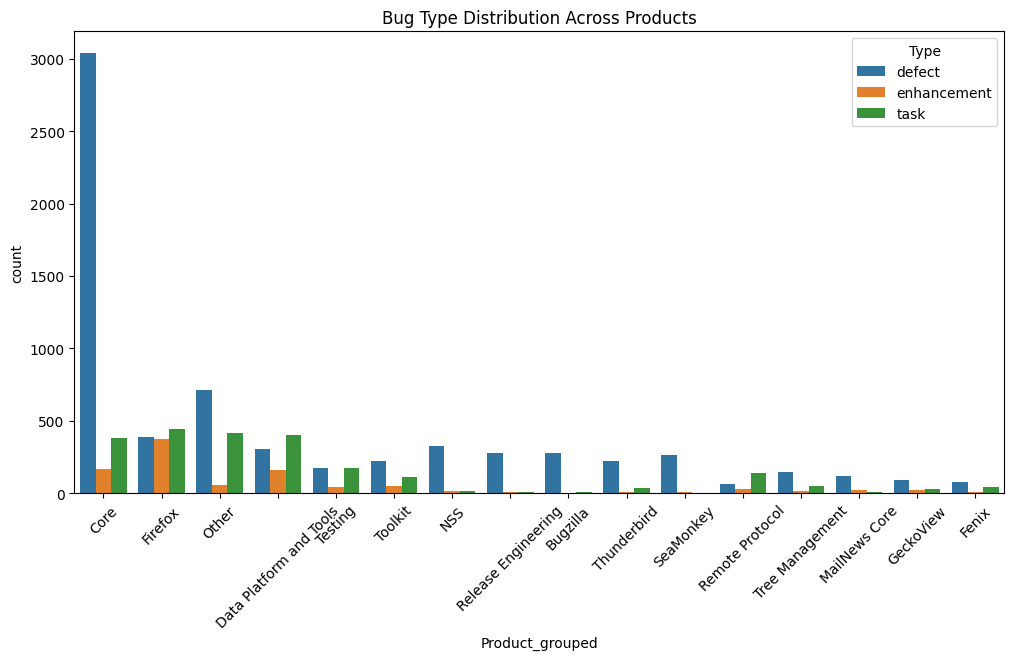

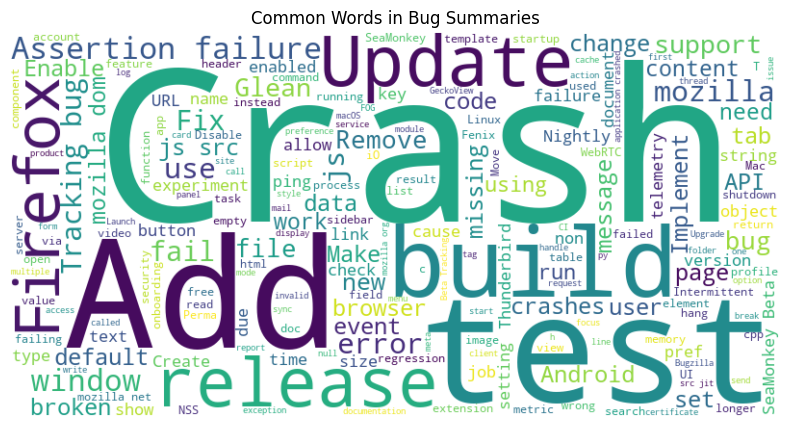

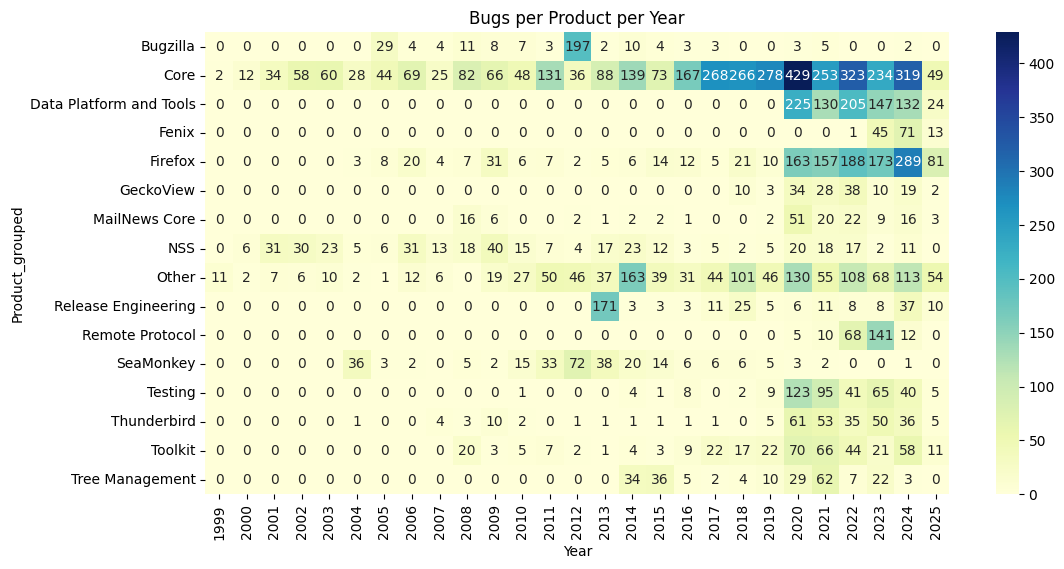

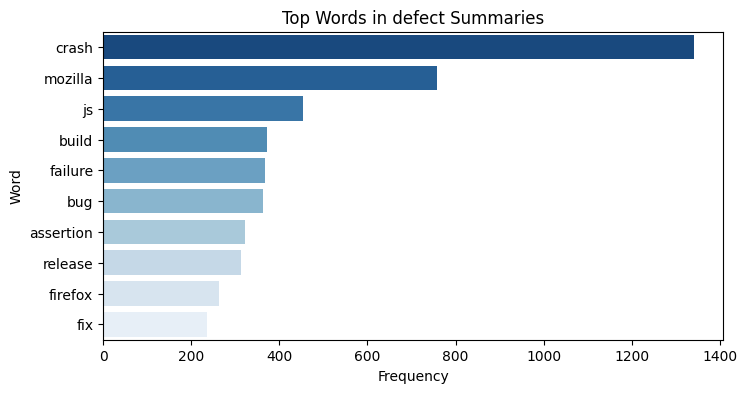

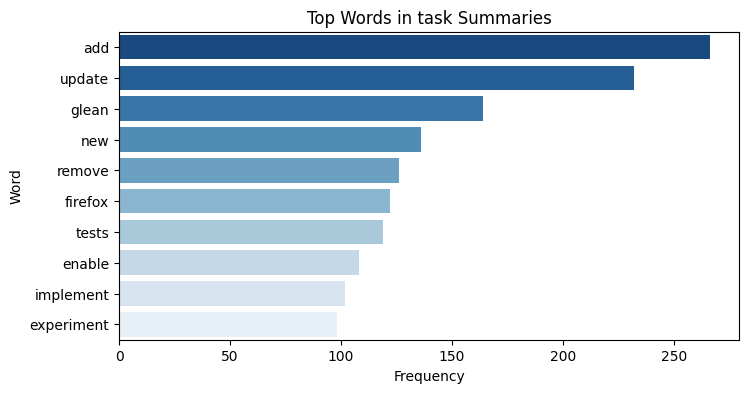

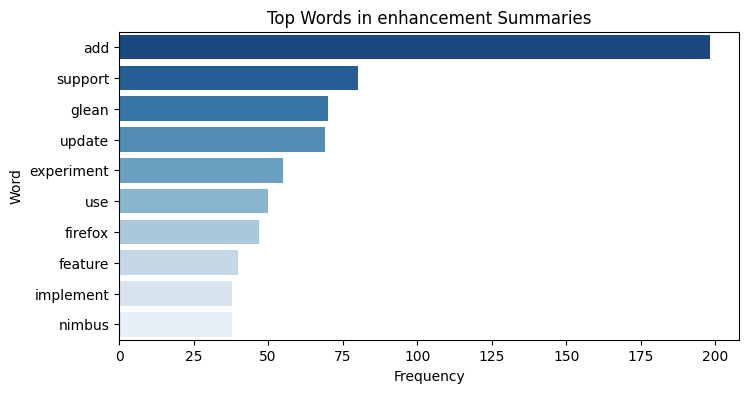


Correlation Matrix:
              Year  Month  Type_encoded
Year          1.00  -0.10          0.37
Month        -0.10   1.00         -0.01
Type_encoded  0.37  -0.01          1.00


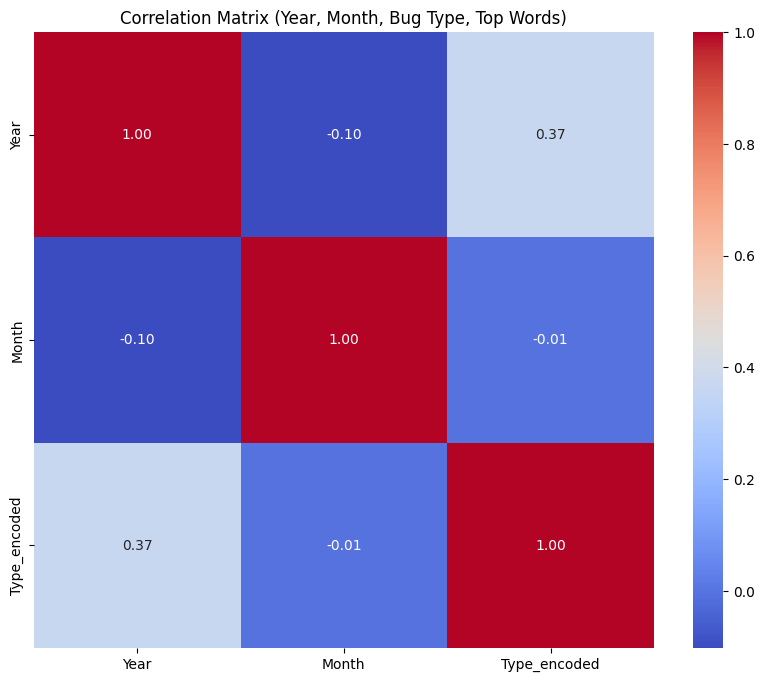


Strong correlations (>|0.3|):
Type_encoded  Year            0.366585
Year          Type_encoded    0.366585
dtype: float64

EXTENDED CORRELATION MATRIX SECTION (Label Encoded)

Correlation Matrix:
                          Year  Month  Type_encoded  Product_grouped_encoded  \
Year                     1.00  -0.10          0.37                     0.05   
Month                   -0.10   1.00         -0.01                     0.00   
Type_encoded             0.37  -0.01          1.00                     0.11   
Product_grouped_encoded  0.05   0.00          0.11                     1.00   
Component_encoded        0.01  -0.01          0.02                     0.20   

                         Component_encoded  
Year                                  0.01  
Month                                -0.01  
Type_encoded                          0.02  
Product_grouped_encoded               0.20  
Component_encoded                     1.00  


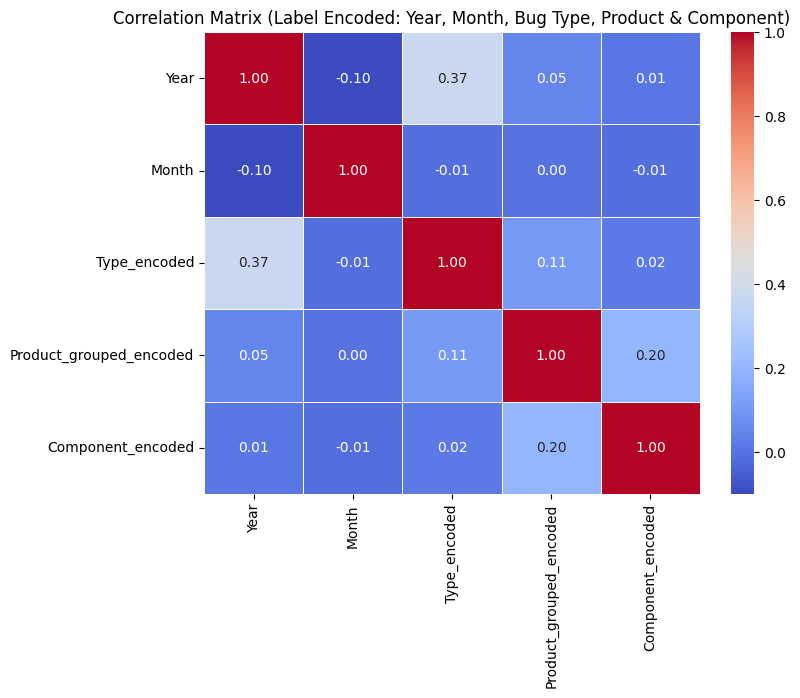


Correlation of Each Feature with Target (Bug Type):

Year                       0.37
Product_grouped_encoded    0.11
Component_encoded          0.02
Month                     -0.01
Name: Type_encoded, dtype: float64

Strongly correlated features with Bug Type (>|0.3|):
 Year    0.37
Name: Type_encoded, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_17896\3717323127.py:229: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")


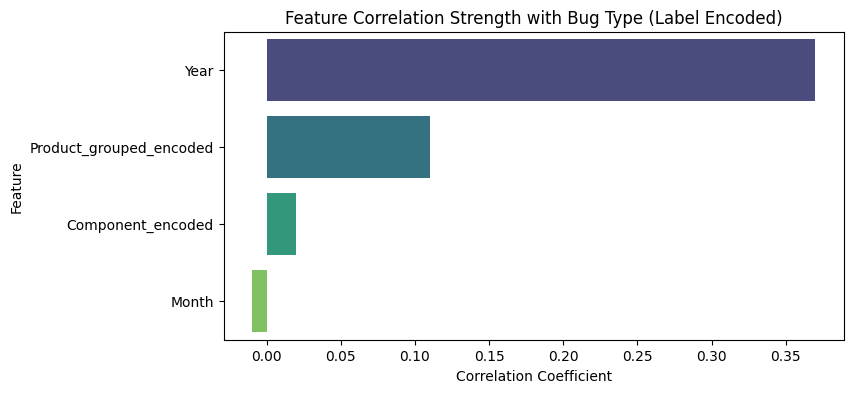

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("bugs-2025-02-23.csv")
#first understand the data
print(df.shape)
print(df.info())
print(df.describe())

print(df.columns)
print(df.head())

#columns: status and resoulution are not useful for predicting bug type as these features(status and resolution) must come after predicting bug type
#bug id column is of no use but just a number shows the bug entry.

new_df1=df.drop(columns=["Bug ID","Status","Resolution","Assignee"])
new_df1

#now we will expand updated column by separating time, year, month, and day
#first change the dtypes of columns from object to string for type, summary, product and updated

new_df1["Type"]=new_df1["Type"].astype("category")
new_df1["Summary"]=new_df1["Summary"].astype("string")
new_df1["Product"]=new_df1["Product"].astype("category")
new_df1["Component"]=new_df1["Component"].astype("category")
new_df1["Updated"] = pd.to_datetime(new_df1["Updated"], errors="coerce")

#updated column is only useful if we extract year or month bcz that will show which bug type more common in that month of year.

new_df1["Year"]=new_df1["Updated"].dt.year
new_df1["Month"]=new_df1["Updated"].dt.month

#now i can drop updated column
new_df1=new_df1.drop(columns=["Updated"])

new_df1.isna().sum() #it shows me that there is no missing values in my dataset

#now check class balance
new_df1["Type"].value_counts()

#as type contains three unique values-> defect(6712), task(2280), enhancement(1008), so first balance the class using smote for which one hot encoding is needed
# Get top 15 products by frequency
top_products = new_df1["Product"].value_counts().nlargest(15).index
# Replace all other products with "Other"
new_df1["Product_grouped"] = new_df1["Product"].apply(lambda x: x if x in top_products else "Other")
print(new_df1["Product_grouped"].value_counts())
#so now drop product column
new_df1=new_df1.drop(columns=["Product"])

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Features & target
X = new_df1.drop("Type", axis=1)
y = new_df1["Type"]

# Define feature types
text_features = ["Summary"]
categorical_features = ["Product_grouped", "Component"]
numeric_features = ["Year", "Month"]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(max_features=500), "Summary"),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

print("Before SMOTE:\n", y.value_counts())
print("After SMOTE:\n", pd.Series(y_resampled).value_counts())

#will show how the class balancing effects visually
class_order=["defect","task","enhancement"]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=y,order=class_order,color='Grey')
plt.title("Class Distribution Before SMOTE")

plt.subplot(1,2,2)
sns.countplot(x=y_resampled,order=class_order,color='Brown')
plt.title("Class Distribution After SMOTE")
plt.show()

#bugs per year
plt.figure(figsize=(8,5))
sns.countplot(x=new_df1["Year"],order=sorted(new_df1["Year"].unique()),color="Brown")
plt.title("Number of Bugs per Year")
plt.xticks(rotation=45)
plt.show()

#bug type distribution per product
plt.figure(figsize=(12,6))
sns.countplot(data=new_df1,x="Product_grouped",hue="Type", order=new_df1["Product_grouped"].value_counts().index)
plt.title("Bug Type Distribution Across Products")
plt.xticks(rotation=45)
plt.show()

#to show common words in bug use wordcloud
from wordcloud import WordCloud

text = " ".join(new_df1["Summary"].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Bug Summaries")
plt.show()


# Pivot heatmap: products x year
pivot = new_df1.pivot_table(index="Product_grouped", columns="Year", values="Summary", aggfunc="count").fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Bugs per Product per Year")
plt.show()

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english", max_features=20)
for bug_type in new_df1["Type"].unique():
    summaries = new_df1[new_df1["Type"]==bug_type]["Summary"].dropna().astype(str)
    counts = vectorizer.fit_transform(summaries)
    word_freq = dict(zip(vectorizer.get_feature_names_out(), counts.toarray().sum(axis=0)))
    top_words = pd.Series(word_freq).sort_values(ascending=False).head(10)

    plt.figure(figsize=(8,4))
    sns.barplot(x=top_words.values,
                y=top_words.index,
                hue=top_words.index,
                palette="Blues_r",
                dodge=False,
                legend=False)
    plt.title(f"Top Words in {bug_type} Summaries")
    plt.xlabel("Frequency")   #x-axis:how many times the word appeared
    plt.ylabel("Word")        #y-axis:the actual word
    plt.show()


# Since we have text and categorical data, we can only compute correlation
# on numeric features (Year, Month) or encoded forms.
# We'll create a DataFrame with Year, Month, and a numeric encoding of Type for visualization.

# Copy numeric subset
corr_df = new_df1[["Year", "Month"]].copy()

# Encode target (Type) as numeric for correlation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
corr_df["Type_encoded"] = le.fit_transform(new_df1["Type"])

# Compute correlation
corr_matrix = corr_df.corr()

# Show correlation values
print("\nCorrelation Matrix:")
print(corr_matrix.round(2))

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Year, Month, Bug Type, Top Words)")
plt.show()

threshold = 0.3
strong_corr = corr_matrix.unstack().sort_values(ascending=False)
strong_corr = strong_corr[(abs(strong_corr) > threshold) & (strong_corr < 1)]

print("\nStrong correlations (>|0.3|):")
print(strong_corr)

# result shows that bug_type n year are somewhat related
from sklearn.preprocessing import LabelEncoder

print("\nEXTENDED CORRELATION MATRIX SECTION (Label Encoded)")

# Create a copy of the dataframe with relevant features
corr_df = new_df1[["Year", "Month", "Type", "Product_grouped", "Component"]].copy()

# Encode all categorical columns using LabelEncoder
le_type = LabelEncoder()
le_product = LabelEncoder()
le_component = LabelEncoder()

corr_df["Type_encoded"] = le_type.fit_transform(corr_df["Type"])
corr_df["Product_grouped_encoded"] = le_product.fit_transform(corr_df["Product_grouped"])
corr_df["Component_encoded"] = le_component.fit_transform(corr_df["Component"])

# Compute correlation matrix
corr_matrix = corr_df[["Year", "Month", "Type_encoded", "Product_grouped_encoded", "Component_encoded"]].corr().round(2)

# Print numeric correlation table
print("\nCorrelation Matrix:\n", corr_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Label Encoded: Year, Month, Bug Type, Product & Component)")
plt.show()

# TOP CORRELATIONS WITH TARGET
target_corr = corr_matrix["Type_encoded"].drop("Type_encoded").sort_values(ascending=False)
print("\nCorrelation of Each Feature with Target (Bug Type):\n")
print(target_corr)

# Highlight features with notable correlation (>|0.3|)
threshold = 0.3
strong_corr = target_corr[abs(target_corr) > threshold]

if not strong_corr.empty:
    print("\nStrongly correlated features with Bug Type (>|0.3|):\n", strong_corr)
else:
    print("\nNo features show strong correlation (>|0.3|). Relationships are weak or moderate.")

# Optional bar plot for feature correlation with Bug Type
plt.figure(figsize=(8,4))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")
plt.title("Feature Correlation Strength with Bug Type (Label Encoded)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()


In [4]:
df.columns

Index(['Bug ID', 'Type', 'Summary', 'Product', 'Component', 'Assignee',
       'Status', 'Resolution', 'Updated'],
      dtype='object')

1. Component-wise Bug Count per Type:


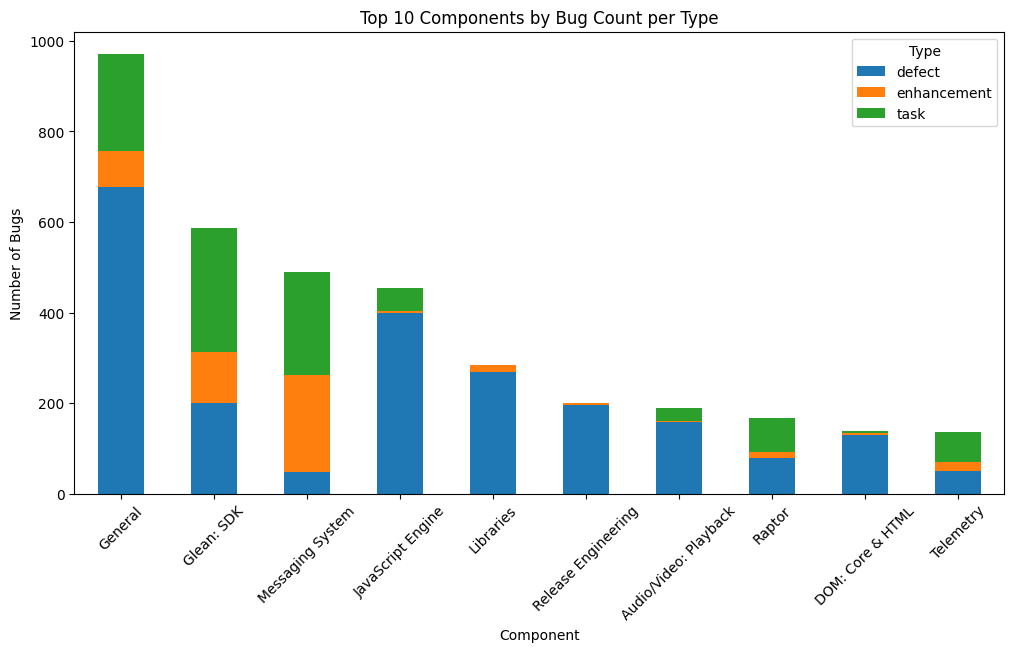


2. Correlation of Year/Month with Bug Type:
                  Year     Month  Type_encoded
Year          1.000000 -0.102277      0.366585
Month        -0.102277  1.000000     -0.006298
Type_encoded  0.366585 -0.006298      1.000000


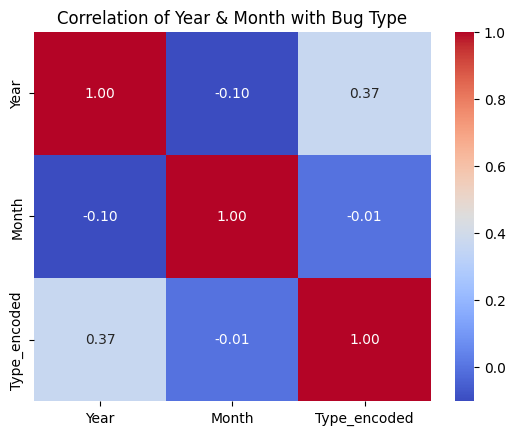


3. Bugs per Product per Year:
Year                     1999  2000  2001  2002  2003  2004  2005  2006  2007  \
Product_grouped                                                                 
Bugzilla                  0.0   0.0   0.0   0.0   0.0   0.0  29.0   4.0   4.0   
Core                      2.0  12.0  34.0  58.0  60.0  28.0  44.0  69.0  25.0   
Data Platform and Tools   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Fenix                     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Firefox                   0.0   0.0   0.0   0.0   0.0   3.0   8.0  20.0   4.0   
GeckoView                 0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
MailNews Core             0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
NSS                       0.0   6.0  31.0  30.0  23.0   5.0   6.0  31.0  13.0   
Other                    11.0   2.0   7.0   6.0  10.0   2.0   1.0  12.0   6.0   
Release Engineering       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 

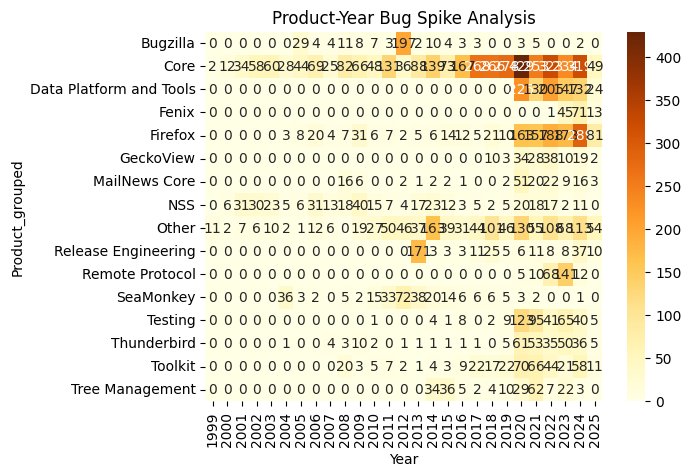


4. Top Words in Summaries per Bug Type:

Top words in defect:
crash        1340
mozilla       757
js            453
build         373
failure       367
bug           362
assertion     322
release       313
firefox       263
fix           235
dtype: int64

Top words in task:
add           266
update        232
glean         164
new           136
remove        126
firefox       122
tests         119
enable        108
implement     102
experiment     98
dtype: int64

Top words in enhancement:
add           198
support        80
glean          70
update         69
experiment     55
use            50
firefox        47
feature        40
implement      38
nimbus         38
dtype: int64

5. Class Distribution After SMOTE:
Type
defect         6712
enhancement    6712
task           6712
Name: count, dtype: int64
Product_grouped          Component             
Core                     JavaScript Engine         399
NSS                      Libraries                 269
Data Platform and Tools  G

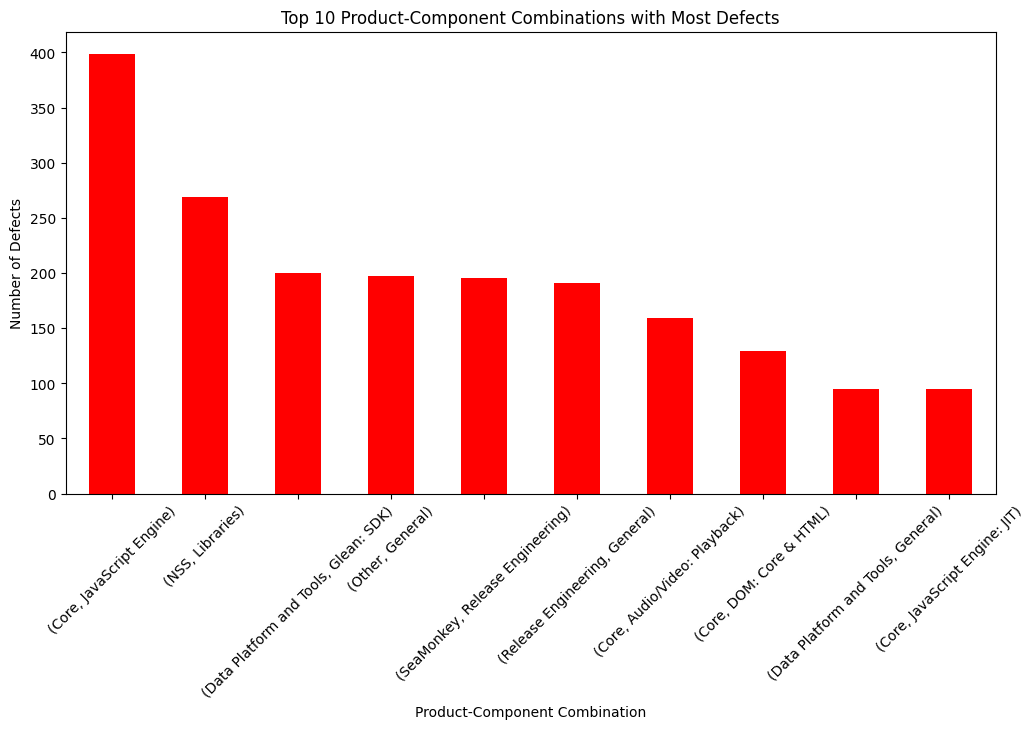


7. Top TF-IDF Features per Bug Type:

Bug Type: defect
['assertion' 'bug' 'build' 'crash' 'failure' 'firefox' 'fix' 'js'
 'mozilla' 'release']

Bug Type: task
['add' 'enable' 'experiment' 'firefox' 'glean' 'implement' 'new' 'remove'
 'tests' 'update']

Bug Type: enhancement
['add' 'default' 'experiment' 'feature' 'firefox' 'glean' 'implement'
 'support' 'update' 'use']

8. Correlation of Product & Component with Bug Type:
                   Type_encoded  Product_encoded  Component_encoded
Type_encoded           1.000000         0.108963           0.020671
Product_encoded        0.108963         1.000000           0.200076
Component_encoded      0.020671         0.200076           1.000000


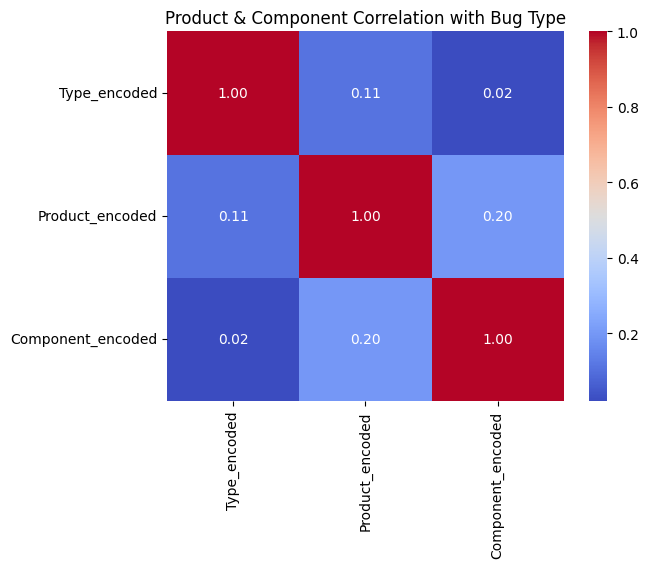


9. Bugs containing specific keywords in Summary:
Keyword 'crash': 1593 occurrences
Keyword 'error': 433 occurrences
Keyword 'fail': 804 occurrences

10. Feature Correlation Strength with Bug Type:
 Year                 0.366585
Product_encoded      0.108963
Component_encoded    0.020671
Month               -0.006298
Name: Type_encoded, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_14176\2255944013.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")


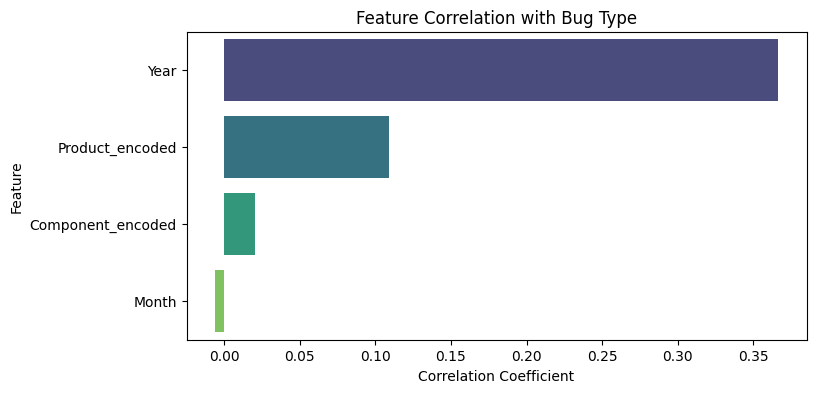

In [8]:
# Which component has the highest number of defects vs enhancements vs tasks?
print("1. Component-wise Bug Count per Type:")
# Count defects per component
component_counts = df.groupby(["Component","Type"]).size().unstack(fill_value=0)
# Get top 10 components by total bugs
top_components = component_counts.sum(axis=1).sort_values(ascending=False).head(10).index
top_component_counts = component_counts.loc[top_components]
# Plot
top_component_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Top 10 Components by Bug Count per Type")
plt.ylabel("Number of Bugs")
plt.xticks(rotation=45)
plt.show()


#Are there correlations between Month/Year and bug type? (Seasonality effect)
le_type = LabelEncoder()
df["Type_encoded"] = le_type.fit_transform(df["Type"])
corr_matrix = df[["Year","Month","Type_encoded"]].corr()
print("\n2. Correlation of Year/Month with Bug Type:")
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Year & Month with Bug Type")
plt.show()

#Which products have a sudden spike in bug reports over years?

if "Product_grouped" not in df.columns:
    top_products = df["Product"].value_counts().nlargest(15).index
    df["Product_grouped"] = df["Product"].apply(lambda x: x if x in top_products else "Other")
    df = df.drop(columns=["Product"], errors='ignore')
pivot = df.pivot_table(index="Product_grouped", columns="Year", values="Summary", aggfunc="count").fillna(0)
print("\n3. Bugs per Product per Year:")
print(pivot)
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrBr")
plt.title("Product-Year Bug Spike Analysis")
plt.show()

#Top words in defect summaries vs enhancement summaries — can you differentiate them?
print("\n4. Top Words in Summaries per Bug Type:")
vectorizer = CountVectorizer(stop_words="english", max_features=20)
for bug_type in df["Type"].unique():
    summaries = df[df["Type"]==bug_type]["Summary"].astype(str)
    counts = vectorizer.fit_transform(summaries)
    word_freq = dict(zip(vectorizer.get_feature_names_out(), counts.toarray().sum(axis=0)))
    top_words = pd.Series(word_freq).sort_values(ascending=False).head(10)
    print(f"\nTop words in {bug_type}:\n{top_words}")

# After SMOTE, how balanced is each bug type numerically?
print("\n5. Class Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())

#Which Product-Component combinations have the highest number of defects?
defects_df = df[df["Type"] == "defect"]
# Group by Product & Component
prod_comp_counts = defects_df.groupby(["Product_grouped","Component"]).size().sort_values(ascending=False)
print(prod_comp_counts.head(10))  # top 10 combinations
top10 = prod_comp_counts.head(10)
top10.plot(kind='bar', figsize=(12,6), color='red')
plt.title("Top 10 Product-Component Combinations with Most Defects")
plt.ylabel("Number of Defects")
plt.xlabel("Product-Component Combination")
plt.xticks(rotation=45)
plt.show()

#Compute TF-IDF for summaries and show top features per bug type (new insight for predictive modeling)
print("\n7. Top TF-IDF Features per Bug Type:")
for bug_type in df["Type"].unique():
    summaries = df[df["Type"]==bug_type]["Summary"].astype(str)
    tfidf = TfidfVectorizer(max_features=10, stop_words="english")
    X_tfidf = tfidf.fit_transform(summaries)
    print(f"\nBug Type: {bug_type}")
    print(tfidf.get_feature_names_out())

# Is there any correlation between Product and Component with Bug Type?
le_product = LabelEncoder()
le_component = LabelEncoder()
df["Product_encoded"] = le_product.fit_transform(df["Product_grouped"])
df["Component_encoded"] = le_component.fit_transform(df["Component"])
corr_matrix2 = df[["Type_encoded","Product_encoded","Component_encoded"]].corr()
print("\n8. Correlation of Product & Component with Bug Type:")
print(corr_matrix2)

sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Product & Component Correlation with Bug Type")
plt.show()

# How many bugs contain keywords like “crash”, “error”, or “fail” in summary?
keywords = ["crash","error","fail"]
print("\n9. Bugs containing specific keywords in Summary:")
for kw in keywords:
    count = df["Summary"].str.contains(kw, case=False).sum()
    print(f"Keyword '{kw}': {count} occurrences")

#If we encode Product and Component numerically, which feature correlates strongest with Bug Type?
features = ["Year","Month","Product_encoded","Component_encoded"]
corr_with_target = df[features + ["Type_encoded"]].corr()["Type_encoded"].drop("Type_encoded").sort_values(ascending=False)
print("\n10. Feature Correlation Strength with Bug Type:\n", corr_with_target)

plt.figure(figsize=(8,4))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")
plt.title("Feature Correlation with Bug Type")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()



<div style="font-family: 'Segoe UI', Roboto, Arial, sans-serif; border-radius:12px; padding:18px; background: linear-gradient(135deg, #f7fbff 0%, #e6f2fb 100%); border:1px solid #cfe9fb; color:#03314b; max-width:950px; margin:10px auto; box-shadow:0 6px 18px rgba(3,49,75,0.08);">
  <div style="font-size:20px; font-weight:700; margin-bottom:10px; color:#013a63;">KNN Implementation</div>

  <ul style="margin:0; padding-left:18px;">
    <li style="margin:8px 0; line-height:1.45;">
      <span style="display:inline-block; font-size:12px; padding:3px 8px; border-radius:999px; background:#e3f6fb; color:#03506f; margin-right:6px;">Scaling</span> Numeric columns <code>Year</code> and <code>Month</code> are scaled using <code>StandardScaler</code> to bring them to comparable ranges. This is important for distance-based algorithms like KNN.
    </li>
    <li style="margin:8px 0; line-height:1.45;">
      <span style="display:inline-block; font-size:12px; padding:3px 8px; border-radius:999px; background:#e3f6fb; color:#03506f; margin-right:6px;">Train-Test Split</span> Split the dataset into 80% training and 20% testing with <code>stratify=y_resampled</code> to maintain class balance in both sets.
    </li>
    <li style="margin:8px 0; line-height:1.45;">
      <span style="display:inline-block; font-size:12px; padding:3px 8px; border-radius:999px; background:#e3f6fb; color:#03506f; margin-right:6px;">Initial k</span> Calculated using <code>sqrt(n_train)</code> as a rule of thumb for KNN. This provides a reasonable starting point.
    </li>
    <li style="margin:8px 0; line-height:1.45;">
      <span style="display:inline-block; font-size:12px; padding:3px 8px; border-radius:999px; background:#e3f6fb; color:#03506f; margin-right:6px;">K Tuning</span> We test several odd values of k around the initial estimate to find the optimal k that gives the highest accuracy.
    </li>
    <li style="margin:8px 0; line-height:1.45;">
      <span style="display:inline-block; font-size:12px; padding:3px 8px; border-radius:999px; background:#e3f6fb; color:#03506f; margin-right:6px;">Weighted KNN</span> <code>weights='distance'</code> is used so closer neighbors contribute more to the prediction than farther ones, improving accuracy especially on imbalanced or noisy datasets.
    </li>
    <li style="margin:8px 0; line-height:1.45;">
      <span style="display:inline-block; font-size:12px; padding:3px 8px; border-radius:999px; background:#e3f6fb; color:#03506f; margin-right:6px;">Distance Metric</span> <code>metric='cosine'</code> is chosen because the feature space is high-dimensional (TF-IDF + one-hot features), and cosine distance works better for sparse vectors than Euclidean distance.
    </li>
    <li style="margin:8px 0; line-height:1.45;">
      <span style="display:inline-block; font-size:12px; padding:3px 8px; border-radius:999px; background:#e3f6fb; color:#03506f; margin-right:6px;">Parallelization</span> <code>n_jobs=-1</code> uses all CPU cores to speed up computation on large datasets.
    </li>
    <li style="margin:8px 0; line-height:1.45;">
      <span style="display:inline-block; font-size:12px; padding:3px 8px; border-radius:999px; background:#e3f6fb; color:#03506f; margin-right:6px;">Evaluation</span> <code>accuracy_score</code> is used to measure performance on the test set. Each k is evaluated and printed.
    </li>
    <li style="margin:8px 0; line-height:1.45;">
      <span style="display:inline-block; font-size:12px; padding:3px 8px; border-radius:999px; background:#e3f6fb; color:#03506f; margin-right:6px;">Best k</span> The value of k with the highest accuracy is selected and printed as the optimal k.
    </li>
  </ul>

"We scaled numeric features, split the data while maintaining class balance, and used a weighted KNN with cosine distance. Multiple k values were tested to find the optimal one for highest accuracy, leveraging distance weighting and parallel computation to improve performance on this high-dimensional, large dataset."

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_resampled = X_resampled.toarray() if not isinstance(X_resampled, np.ndarray) else X_resampled
#Scale numeric columns (Year, Month)
scaler = StandardScaler()
X_resampled[:, -2:] = scaler.fit_transform(X_resampled[:, -2:])

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

n_train = X_train.shape[0]
initial_k = int(np.sqrt(n_train))
print(f"Initial estimate for k based on sqrt(n_train): {initial_k}")

#Define k values to test
k_values = list(range(max(1, initial_k-10), initial_k+11, 2))
accuracies = []

for k in k_values:
    #Weighted KNN with cosine distance
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='distance',
        metric='cosine',
        n_jobs=-1
    )
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k} --> Accuracy: {acc*100:.4f}%")

best_k = k_values[np.argmax(accuracies)]
print(f"\nBest k: {best_k} with Accuracy: {max(accuracies)*100:.4f}%")

Initial estimate for k based on sqrt(n_train): 126
k=116 --> Accuracy: 81.6286%
k=118 --> Accuracy: 81.4548%
k=120 --> Accuracy: 81.3803%
k=122 --> Accuracy: 81.3307%
k=124 --> Accuracy: 81.3307%
k=126 --> Accuracy: 81.2314%
k=128 --> Accuracy: 81.3555%
k=130 --> Accuracy: 81.2810%
k=132 --> Accuracy: 81.2562%
k=134 --> Accuracy: 81.1569%
k=136 --> Accuracy: 81.1072%

Best k: 116 with Accuracy: 81.6286%


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ensure data is in numpy array
X_resampled = X_resampled.toarray() if not isinstance(X_resampled, np.ndarray) else X_resampled

# Scale numeric columns (assuming last 2 are numeric)
scaler = StandardScaler()
X_resampled[:, -2:] = scaler.fit_transform(X_resampled[:, -2:])

#Split into train, validation, and test sets
#First split: train_temp (80%) + test (20%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

#Second split: train (70%) + validation (10%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=0.125, random_state=42, stratify=y_train_temp
)
# (0.8 * 0.125 = 0.1 of total data → 70/10/20 split)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

#Find best k using validation set
n_train = X_train.shape[0]
initial_k = int(np.sqrt(n_train))
print(f"\nInitial estimate for k based on sqrt(n_train): {initial_k}")

k_values = list(range(max(1, initial_k - 10), initial_k + 11, 2))
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='distance',
        metric='cosine',
        n_jobs=-1
    )
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(acc)
    print(f"k={k} --> Validation Accuracy: {acc*100:.4f}%")

best_k = k_values[np.argmax(val_accuracies)]
print(f"\nBest k (on validation): {best_k} with Accuracy: {max(val_accuracies)*100:.4f}%")

#Final Evaluation on Test Set
knn_best = KNeighborsClassifier(
    n_neighbors=best_k,
    weights='distance',
    metric='cosine',
    n_jobs=-1
)
knn_best.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))
y_test_pred = knn_best.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nFinal Test Accuracy (using best k={best_k}): {test_acc*100:.4f}%")

print("SECOND VALIDATION SPLITTING\n")

#second splitting
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=0.1875, random_state=42, stratify=y_train_temp
)
# (0.8 * 0.1875 = 0.2 of total data → 60/20/20 split)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

#Find best k using validation set
n_train = X_train.shape[0]
initial_k = int(np.sqrt(n_train))
print(f"\nInitial estimate for k based on sqrt(n_train): {initial_k}")

k_values = list(range(max(1, initial_k - 10), initial_k + 11, 2))
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='distance',
        metric='cosine',
        n_jobs=-1
    )
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(acc)
    print(f"k={k} --> Validation Accuracy: {acc*100:.4f}%")

best_k = k_values[np.argmax(val_accuracies)]
print(f"\nBest k (on validation): {best_k} with Accuracy: {max(val_accuracies)*100:.4f}%")

#Final Evaluation on Test Set
knn_best = KNeighborsClassifier(
    n_neighbors=best_k,
    weights='distance',
    metric='cosine',
    n_jobs=-1
)
knn_best.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))
y_test_pred = knn_best.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nFinal Test Accuracy (using best k={best_k}): {test_acc*100:.4f}%")

#THIRD SPLITTING :30 PERCENY

print("THIRD VALIDATION SPLITTING\n ")
X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=0.375, random_state=42, stratify=y_train_temp
)
# (0.8 * 0.375 = 0.1 of total data → 50/30/20 split)

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

#Find best k using validation set
n_train = X_train.shape[0]
initial_k = int(np.sqrt(n_train))
print(f"\nInitial estimate for k based on sqrt(n_train): {initial_k}")

k_values = list(range(max(1, initial_k - 10), initial_k + 11, 2))
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='distance',
        metric='cosine',
        n_jobs=-1
    )
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(acc)
    print(f"k={k} --> Validation Accuracy: {acc*100:.4f}%")

best_k = k_values[np.argmax(val_accuracies)]
print(f"\nBest k (on validation): {best_k} with Accuracy: {max(val_accuracies)*100:.4f}%")

#Final Evaluation on Test Set
knn_best = KNeighborsClassifier(
    n_neighbors=best_k,
    weights='distance',
    metric='cosine',
    n_jobs=-1
)
knn_best.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))
y_test_pred = knn_best.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nFinal Test Accuracy (using best k={best_k}): {test_acc*100:.4f}%")



Train: 14094, Validation: 2014, Test: 4028

Initial estimate for k based on sqrt(n_train): 118
k=108 --> Validation Accuracy: 78.5501%
k=110 --> Validation Accuracy: 78.5501%
k=112 --> Validation Accuracy: 78.5005%
k=114 --> Validation Accuracy: 78.4012%
k=116 --> Validation Accuracy: 78.3515%
k=118 --> Validation Accuracy: 78.2026%
k=120 --> Validation Accuracy: 78.2026%
k=122 --> Validation Accuracy: 78.2026%
k=124 --> Validation Accuracy: 78.1529%
k=126 --> Validation Accuracy: 78.1033%
k=128 --> Validation Accuracy: 78.0536%

Best k (on validation): 108 with Accuracy: 78.5501%

Final Test Accuracy (using best k=108): 81.7279%
SECOND VALIDATION SPLITTING

Train: 13087, Validation: 3021, Test: 4028

Initial estimate for k based on sqrt(n_train): 114
k=104 --> Validation Accuracy: 78.7819%
k=106 --> Validation Accuracy: 78.4508%
k=108 --> Validation Accuracy: 78.3184%
k=110 --> Validation Accuracy: 78.1860%
k=112 --> Validation Accuracy: 78.2191%
k=114 --> Validation Accuracy: 78.1198

Train: 14094, Validation: 2014, Test: 4028

Initial estimate for k based on sqrt(n_train): 118
k=108 --> Validation Accuracy: 78.5998%
k=110 --> Validation Accuracy: 78.5501%
k=112 --> Validation Accuracy: 78.5005%
k=114 --> Validation Accuracy: 78.3515%
k=116 --> Validation Accuracy: 78.3515%
k=118 --> Validation Accuracy: 78.2026%
k=120 --> Validation Accuracy: 78.2026%
k=122 --> Validation Accuracy: 78.2026%
k=124 --> Validation Accuracy: 78.1529%
k=126 --> Validation Accuracy: 78.1033%
k=128 --> Validation Accuracy: 78.0536%

Best k (on validation): 108 with Accuracy: 78.5998%

Final Test Accuracy (using best k=108): 81.7527%
SECOND VALIDATION SPLITTING

Train: 13087, Validation: 3021, Test: 4028

Initial estimate for k based on sqrt(n_train): 114
k=104 --> Validation Accuracy: 78.7819%
k=106 --> Validation Accuracy: 78.4508%
k=108 --> Validation Accuracy: 78.3184%
k=110 --> Validation Accuracy: 78.1860%
k=112 --> Validation Accuracy: 78.2522%
k=114 --> Validation Accuracy: 78.1198%
k=116 --> Validation Accuracy: 78.2853%
k=118 --> Validation Accuracy: 78.0867%
k=120 --> Validation Accuracy: 78.1529%
k=122 --> Validation Accuracy: 77.9874%
k=124 --> Validation Accuracy: 77.9543%

Best k (on validation): 104 with Accuracy: 78.7819%

Final Test Accuracy (using best k=104): 82.0506%
THIRD VALIDATION SPLITTING
 
Train: 10067, Validation: 6041, Test: 4028

Initial estimate for k based on sqrt(n_train): 100
k=90 --> Validation Accuracy: 78.3811%
k=92 --> Validation Accuracy: 78.2652%
k=94 --> Validation Accuracy: 78.1328%
k=96 --> Validation Accuracy: 78.0997%
k=98 --> Validation Accuracy: 77.9672%
k=100 --> Validation Accuracy: 77.9010%
k=102 --> Validation Accuracy: 77.7189%
k=104 --> Validation Accuracy: 77.7851%
k=106 --> Validation Accuracy: 77.7686%
k=108 --> Validation Accuracy: 77.8679%
k=110 --> Validation Accuracy: 77.6030%

Best k (on validation): 90 with Accuracy: 78.3811%

Final Test Accuracy (using best k=90): 82.6713%


Decision Tree Classifier Accuracy: 83.81%


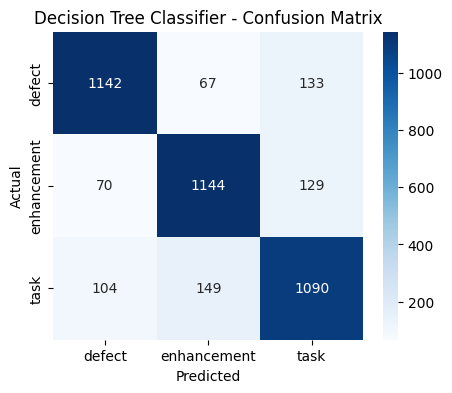

Random Forest Classifier Accuracy: 91.73%


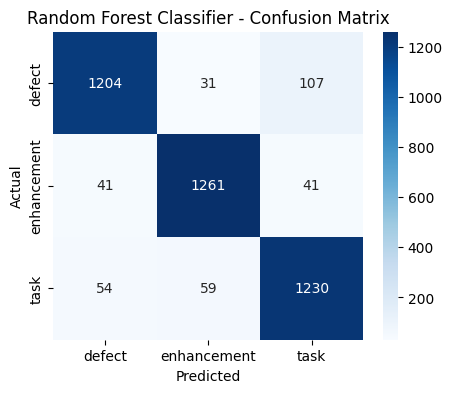

Gaussian Naive Bayes Accuracy: 62.51%


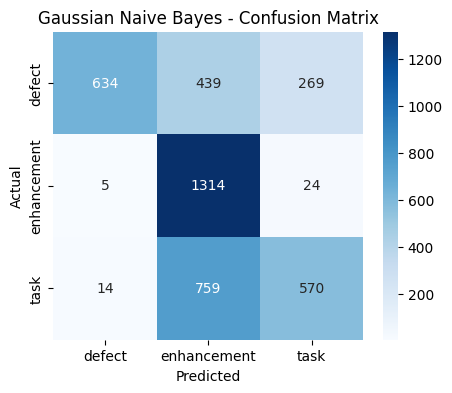

Logistic Regression Accuracy: 80.98%


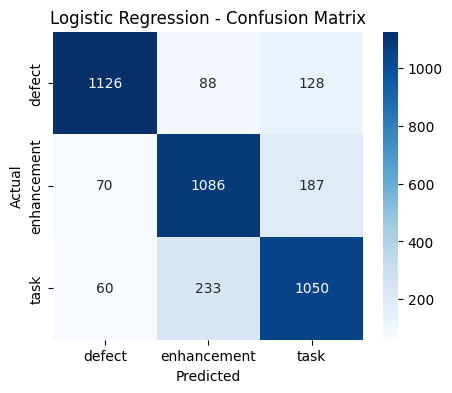

Gradient Boosting Accuracy: 78.40%


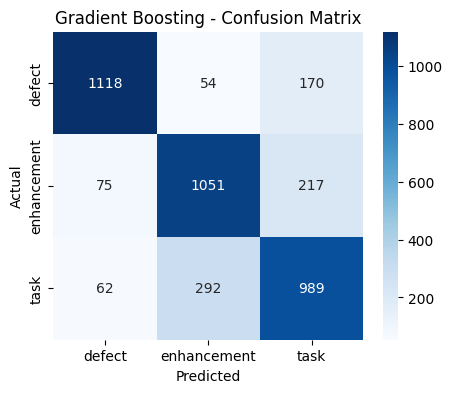

SVM (Linear Kernel) Accuracy: 81.53%


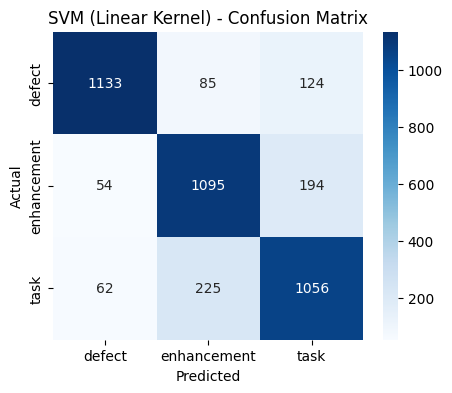

KeyboardInterrupt: 

In [7]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

classifiers = {
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Gaussian Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=500, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True, random_state=42)
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc*100:.2f}%")
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=le_type.classes_)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=le_type.classes_, yticklabels=le_type.classes_, cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('lr', LogisticRegression(max_iter=500)),
        ('svm', SVC(kernel='linear', probability=True, random_state=42))  # <-- Added SVM
    ],
    voting='soft',
    n_jobs=-1
)

ensemble.fit(X_train, y_train)
y_pred_ens = ensemble.predict(X_test)
acc_ens = accuracy_score(y_test, y_pred_ens)
print("Ensemble Voting Classifier Accuracy:", acc_ens*100)

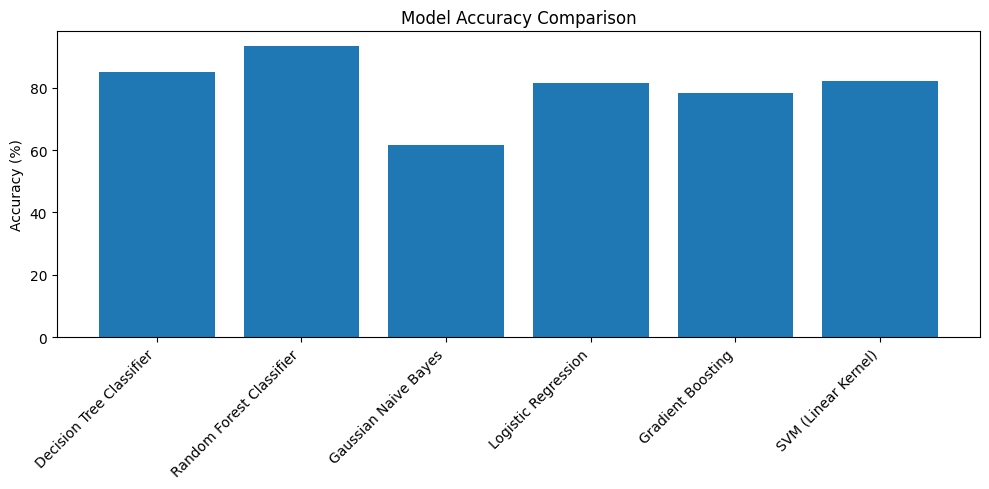

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

model_names = list(results.keys())
accuracies = [v * 100 for v in results.values()]

plt.figure(figsize=(10,5))
plt.bar(model_names, accuracies)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

# Convert results dict → DataFrame
results_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy (%)": [round(v * 100, 2) for v in results.values()]
})

# Save to CSV
results_df.to_csv("model_accuracy_results.csv", index=False)
print("Results exported to: model_accuracy_results.csv")

Results exported to: model_accuracy_results.csv


Stacking Classifier Accuracy: 94.34%


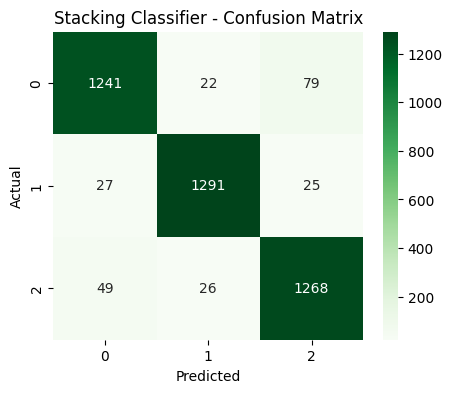


Meta Dataset Shape: (14094, 4)
Example Meta Features (Base Model Predictions):
[['enhancement' 'enhancement' 'enhancement' 'enhancement']
 ['enhancement' 'defect' 'task' 'task']
 ['task' 'task' 'task' 'task']
 ['task' 'enhancement' 'enhancement' 'enhancement']
 ['task' 'task' 'task' 'task']
 ['enhancement' 'enhancement' 'task' 'task']
 ['defect' 'defect' 'defect' 'defect']
 ['defect' 'defect' 'defect' 'defect']
 ['enhancement' 'enhancement' 'enhancement' 'enhancement']
 ['task' 'enhancement' 'enhancement' 'enhancement']]


In [10]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestClassifier, RandomForestRegressor,
    GradientBoostingClassifier, VotingClassifier, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Base learners (Level-0 models)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=500, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42))
]

# Meta-learner (Level-1 model)
meta_learner = LogisticRegression(max_iter=500, random_state=42)

# Stacking Classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=True,   # Passes original features + base model predictions to meta learner
    n_jobs=-1
)

# Fit stacking model
stack_model.fit(X_train, y_train)

# Evaluate on test data
y_pred_stack = stack_model.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Classifier Accuracy: {acc_stack*100:.2f}%")

# Confusion matrix visualization
cm_stack = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_stack, annot=True, fmt="d", cmap="Greens")
plt.title("Stacking Classifier - Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Create Meta Dataset (Base Model Predictions)
# Fit base learners individually to create meta features
fitted_base_learners = [(name, model.fit(X_train, y_train)) for name, model in base_learners]

# Stack their predictions on training data
meta_X = np.column_stack([
    model.predict(X_train) for _, model in fitted_base_learners
])
meta_y = y_train

print("\nMeta Dataset Shape:", meta_X.shape)
print("Example Meta Features (Base Model Predictions):")
print(meta_X[:10])

In [3]:
#ASSIGNMENT 03
#KMEANS CLUSTERING 
# K-MEANS CLUSTERING SECTION

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Copy dataset for clustering
cluster_df = new_df1.copy()

# Label Encoding for categorical columns
le_type = LabelEncoder()
le_product = LabelEncoder()
le_component = LabelEncoder()

cluster_df["Type_encoded"] = le_type.fit_transform(cluster_df["Type"])
cluster_df["Product_grouped_encoded"] = le_product.fit_transform(cluster_df["Product_grouped"])
cluster_df["Component_encoded"] = le_component.fit_transform(cluster_df["Component"])

# Select features for clustering
features = ["Year", "Month", "Product_grouped_encoded", "Component_encoded"]
X_cluster = cluster_df[features]

print("Clustering Feature Sample:\n", X_cluster.head())

Clustering Feature Sample:
    Year  Month  Product_grouped_encoded  Component_encoded
0  2025      2                        1                237
1  2025      2                        4                369
2  2025      2                        4                242
3  2025      2                        4                  7
4  2025      2                        4                263


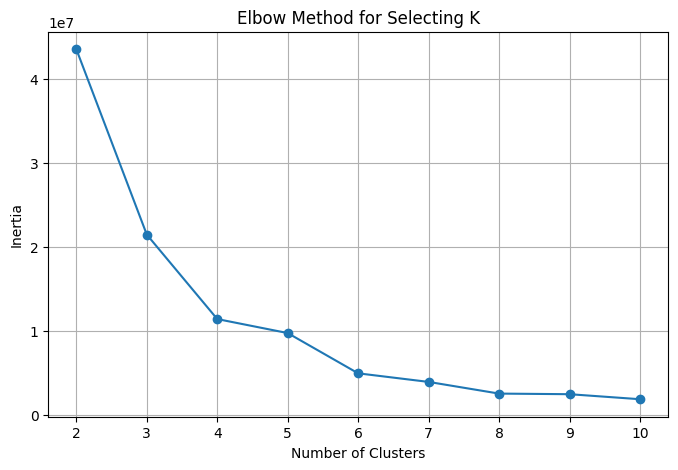

In [4]:
# ELBOW METHOD TO CHOOSE K
inertia = []

K_values = range(2, 11)

for k in K_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_values, inertia, marker='o')
plt.title("Elbow Method for Selecting K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()


In [5]:
# Train final K-Means model
K = 3  # <-- choose based on elbow result
kmeans = KMeans(n_clusters=K, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

# Add cluster labels to dataframe
cluster_df["Cluster"] = cluster_labels
print(cluster_df[["Type", "Cluster"]].head())


          Type  Cluster
0       defect        2
1         task        1
2       defect        2
3         task        0
4  enhancement        2


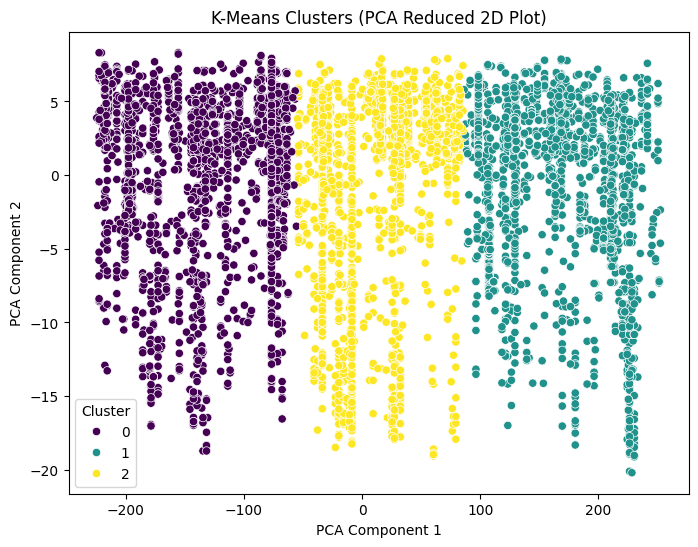

In [6]:
# Use PCA to reduce dimensions for plotting (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],
                hue=cluster_df["Cluster"], palette="viridis")

plt.title("K-Means Clusters (PCA Reduced 2D Plot)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



Cluster vs Actual Bug Type:

Cluster         0     1     2
Type                         
defect       2775  1954  1983
enhancement   335   231   442
task          989   599   692


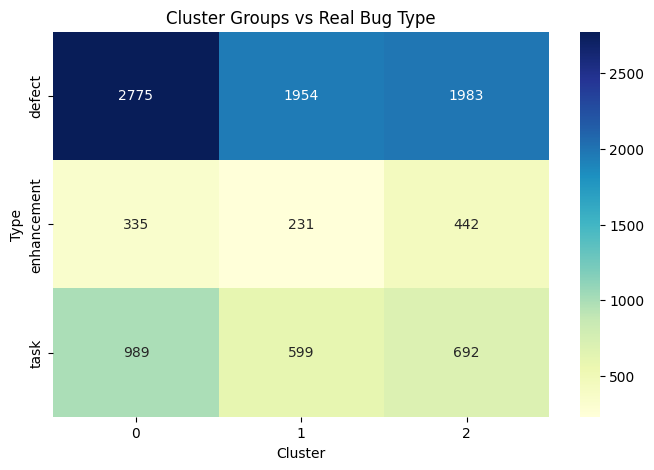

In [7]:
# COMPARING CLUSTERS WITH ACTUAL BUG TYPE
comparison = pd.crosstab(cluster_df["Type"], cluster_df["Cluster"])
print("\nCluster vs Actual Bug Type:\n")
print(comparison)

plt.figure(figsize=(8,5))
sns.heatmap(comparison, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Cluster Groups vs Real Bug Type")
plt.show()


In [8]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print("\nCluster Centroids:\n", centroids)



Cluster Centroids:
           Year     Month  Product_grouped_encoded  Component_encoded
0  2018.529885  6.630886                 4.115638         107.383752
1  2018.122845  6.627874                 6.651221         388.947198
2  2017.793070  6.185435                 4.403914         232.115816


In [9]:
#NEURAL NETWORKS PERCEPTON ALGORITHM

from sklearn.model_selection import train_test_split

# Train-test split for Neural Network
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [10]:
#Perceptron (Single Layer Neural Network)
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Build Perceptron Model
perceptron = Perceptron(max_iter=1000, random_state=42)

# Train model
perceptron.fit(X_train, y_train)

# Predict
y_pred_perceptron = perceptron.predict(X_test)

# Accuracy
acc_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Perceptron Accuracy:", acc_perceptron)

# Classification Report
print("\nClassification Report (Perceptron):")
print(classification_report(y_test, y_pred_perceptron))

# Confusion Matrix
print("\nConfusion Matrix (Perceptron):")
print(confusion_matrix(y_test, y_pred_perceptron))


Perceptron Accuracy: 0.33316782522343596

Classification Report (Perceptron):
              precision    recall  f1-score   support

      defect       0.33      1.00      0.50      1342
 enhancement       0.00      0.00      0.00      1343
        task       0.00      0.00      0.00      1343

    accuracy                           0.33      4028
   macro avg       0.11      0.33      0.17      4028
weighted avg       0.11      0.33      0.17      4028


Confusion Matrix (Perceptron):
[[1342    0    0]
 [1343    0    0]
 [1343    0    0]]


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [11]:
#Multi-Layer Neural Network (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# Build a small neural network
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # 2 hidden layers
    activation="relu",
    max_iter=50,
    random_state=42
)

# Train NN
mlp.fit(X_train, y_train)

# Predict
y_pred_mlp = mlp.predict(X_test)

# Accuracy
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print("Neural Network (MLP) Accuracy:", acc_mlp)

# Classification Report
print("\nClassification Report (MLP Neural Network):")
print(classification_report(y_test, y_pred_mlp))


Neural Network (MLP) Accuracy: 0.7562065541211519

Classification Report (MLP Neural Network):
              precision    recall  f1-score   support

      defect       0.75      0.92      0.83      1342
 enhancement       0.70      0.87      0.78      1343
        task       0.90      0.48      0.62      1343

    accuracy                           0.76      4028
   macro avg       0.78      0.76      0.74      4028
weighted avg       0.78      0.76      0.74      4028



c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#for error metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Precision:", precision_score(y_test, y_pred_mlp, average="weighted"))
print("Recall:", recall_score(y_test, y_pred_mlp, average="weighted"))
print("F1 Score:", f1_score(y_test, y_pred_mlp, average="weighted"))


Accuracy: 0.7562065541211519
Precision: 0.7828997242035315
Recall: 0.7562065541211519
F1 Score: 0.7424020679928804


In [12]:
print("\nMODEL COMPARISON SUMMARY")
print("Perceptron Accuracy:", acc_perceptron)
print("Neural Network (MLP) Accuracy:", acc_mlp)

# K-Means does not have accuracy; it is unsupervised
print("K-Means cannot compute accuracy (unsupervised).")



MODEL COMPARISON SUMMARY
Perceptron Accuracy: 0.33316782522343596
Neural Network (MLP) Accuracy: 0.7562065541211519
K-Means cannot compute accuracy (unsupervised).


✔ Scikit-learn's Perceptron uses Stochastic Gradient Descent (SGD)
✔ MLPClassifier uses Backpropagation + Gradient Descent

So gradient descent is already applied automatically.
Error Metrics (MAE, MSE)

Only valid for regression. For classification, we use accuracy/precision/recall.

In [15]:
#pca 
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled.toarray())  # convert sparse matrix to dense

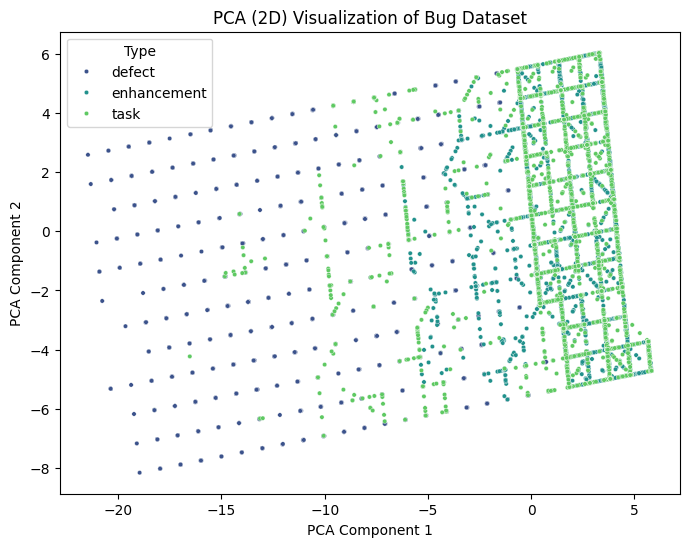

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], 
    y=X_pca[:,1], 
    hue=y_resampled, 
    palette="viridis",
    s=10
)
plt.title("PCA (2D) Visualization of Bug Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
